<h1> BASIC OF MACHINE LEARNING </h1>

In [1]:
import pandas as pd 
df = pd.read_csv('datasets\\Titanic.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [3]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


RandomForestClassifier()

<h1> Accuracy Test </h1>

In [5]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7972027972027972


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

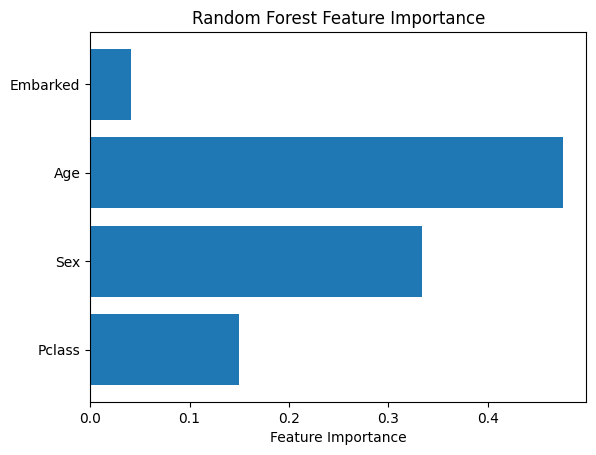

In [6]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


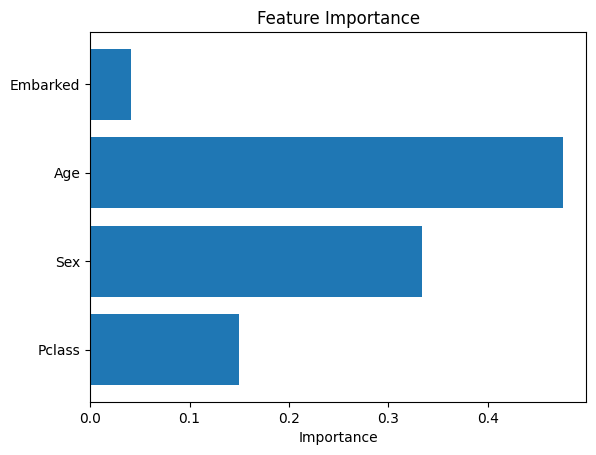

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

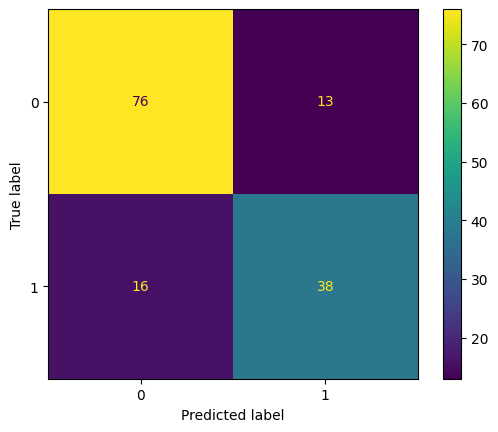

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [ ]:
# Keep only useful columns

df2 = pd.read_csv("datasets\\train.csv")
df2



In [ ]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()


In [ ]:
df2

In [ ]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [ ]:
df2

<h1>selecting X and y </h1>

In [ ]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


In [12]:
# Create Age Groups (demographic buckets)
age_bins = [0, 5, 12, 18, 30, 45, 60, 80]
age_labels = ['0-5','6-12','13-18','19-30','31-45','46-60','60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

df.head()

,Survived,Pclass,Sex,Age,Embarked,AgeGroup
0,0,3,0,22.0,2,19-30
1,1,1,1,38.0,0,31-45
2,1,3,1,26.0,2,19-30
3,1,1,1,35.0,2,31-45
4,0,3,0,35.0,2,31-45


In [13]:
sex_survival = df.groupby("Sex")["Survived"].mean() * 100
print("Survival Rate by Sex (%):")
print(sex_survival)


Survival Rate by Sex (%):
Sex
0    20.529801
1    75.289575
Name: Survived, dtype: float64


<h3> Men had an 18.89% survival rate — the lowest major adult demographic.

This means over 4 out of 5 men died, especially due to class and location disadvantages.</h3>

In [14]:
age_survival = df.groupby("AgeGroup")["Survived"].mean() * 100
print("Survival Rate by Age Group (%):")
print(age_survival)


Survival Rate by Age Group (%):
AgeGroup
0-5      70.454545
6-12     36.000000
13-18    42.857143
19-30    35.555556
31-45    42.288557
46-60    40.740741
60+      19.047619
Name: Survived, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_36768\4057121010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby("AgeGroup")["Survived"].mean() * 100


<h3> Babies and toddlers aged 0–5 had a 70.45% survival rate — the highest survival among all age groups.

They were treated as high priority during evacuation. </h3>

In [15]:
class_survival = df.groupby("Pclass")["Survived"].mean() * 100
print("Survival by Class (%):")
print(class_survival)


Survival by Class (%):
Pclass
1    65.217391
2    47.976879
3    23.943662
Name: Survived, dtype: float64


<h3>Elderly passengers aged 60+ had a 22.73% survival rate — the lowest among age groups.

Their survival odds were close to adult men in 3rd class.</h3>

In [16]:
embarked_survival = df.groupby("Embarked")["Survived"].mean() * 100
print("Survival by Embarkation Port (%):")
print(embarked_survival)


Survival by Embarkation Port (%):
Embarked
0    60.769231
1    28.571429
2    36.281588
Name: Survived, dtype: float64


<h3> First-class passengers had a 62.96% survival rate — showing a strong socioeconomic advantage.

This group benefited from location and priority access to lifeboats.</h3>